In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (30,10)

/home/bhavesh/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [110]:
df_train=pd.read_csv("sales_train.csv")
df_test=pd.read_csv("test.csv")
shop=pd.read_csv("shops.csv")
items=pd.read_csv("items.csv")
item_categories=pd.read_csv("item_categories.csv")

In [111]:
df_train["date"]=pd.to_datetime(df_train["date"])
df_train['day']=df_train['date'].dt.day
df_train['month']=df_train['date'].dt.month
df_train['year']=df_train['date'].dt.year
df_train=df_train.sort_values(by='date')
#df_train.drop(['date'],axis=1,inplace=True)

## Many items id in test set are not in trainset (363)

In [116]:
df_test_shop=df_test['shop_id'].sort_values().unique().tolist()
df_test_item=df_test['item_id'].sort_values().unique().tolist()
df_train_shop=df_train['shop_id'].sort_values().unique().tolist()
df_train_item=df_train['item_id'].sort_values().unique().tolist()
len(set(df_test_item)-set(df_train_item))

363

## Joining the dataframes

In [117]:
merged=pd.merge(df_train,items[['item_id','item_category_id']],on='item_id')

In [140]:
merged.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,item_category_id
0,2013-01-01,0,46,18616,349.0,1.0,1,1,2013,40
1,2013-01-01,0,28,18616,349.0,1.0,1,1,2013,40


## Checking if the price is same for similar categories

In [148]:
temp=merged.groupby('item_category_id').agg({'item_price':['mean','max','min','std'],'item_id':['count']}).reset_index()

In [167]:
temp

item_category_id   item_price                               item_id
                            mean      max     min          std   count
0                 0    87.800000    148.0   22.40    62.961258       3
1                 1   215.500000    283.0  148.00    95.459415       2
2                 2  2261.705152   9990.0   93.00  1175.068988   18461
3                 3  2105.683642   7490.0  122.59  1435.229478   25283
4                 4   554.696081   2590.0   22.00   487.282737    2304
..              ...          ...      ...     ...          ...     ...
79               79  1094.625747  16790.0    9.00   830.026934    9067
80               80  1246.064128   1700.0  900.00   208.086855    1325
81               81   189.050314    599.0   79.00   121.593399     795
82               82    32.481014     70.0   13.00    17.040604    4390
83               83   100.280925    210.0    7.00    29.363512    7206

[84 rows x 6 columns]

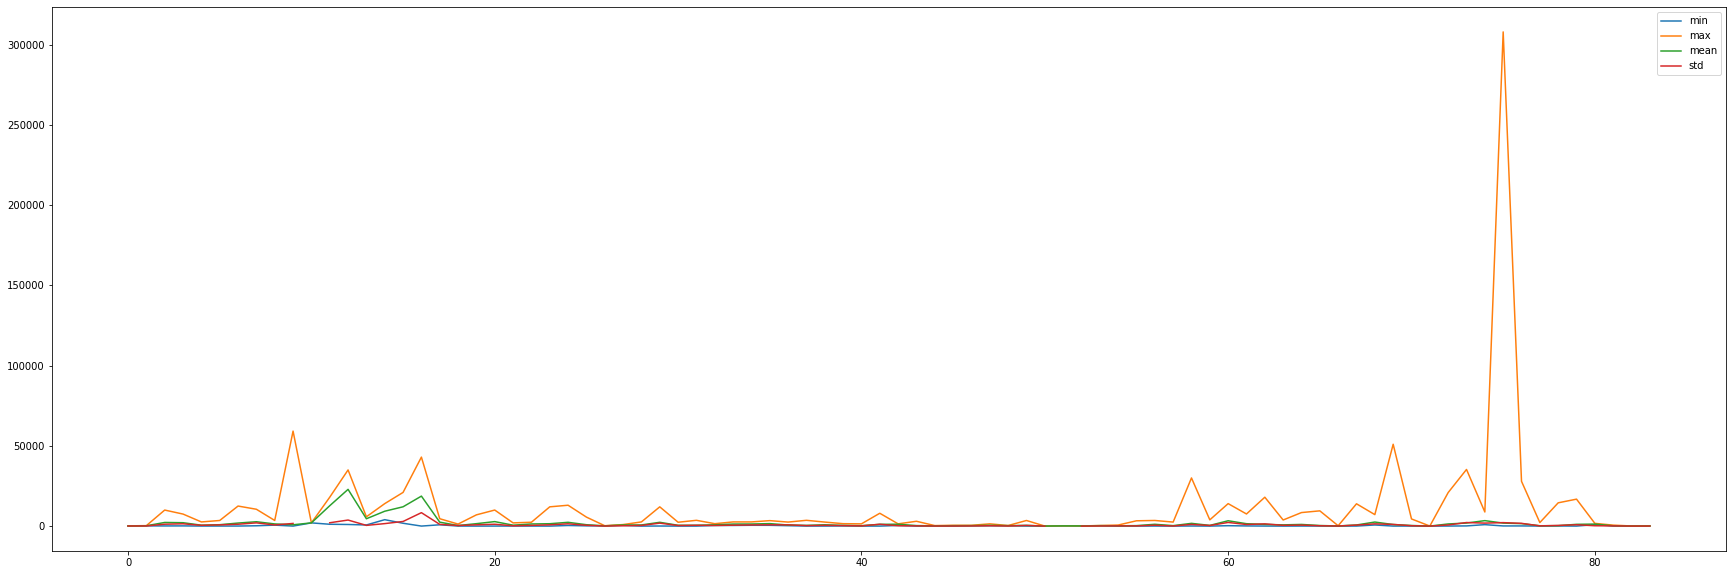

In [168]:
plt.plot(temp['item_category_id'],temp['item_price']['min'],label='min')
plt.plot(temp['item_category_id'],temp['item_price']['max'],label='max')
plt.plot(temp['item_category_id'],temp['item_price']['mean'],label='mean')
plt.plot(temp['item_category_id'],temp['item_price']['std'],label='std')
plt.legend()
plt.show()

In [162]:
temp['item_price']['std'].max()

8365.747366694608

In [65]:
items.loc[(items['item_id']>80) & (items['item_id']<150) ]

,item_name,item_id,item_category_id
81,12 РОЖДЕСТВЕНСКИХ ЖЕЛАНИЙ,81,40
82,12/ДВЕНАДЦАТЬ (BD),82,37
83,12/ДВЕНАДЦАТЬ (СР) (Регион),83,40
84,127 ЧАСОВ,84,40
85,127 ЧАСОВ (BD+DVD),85,37
...,...,...,...
145,1С:Аудиокниги. Али-Баба и сорок разбойников [P...,145,44
146,1С:Аудиокниги. Английские неправильные глаголы...,146,44
147,"1С:Аудиокниги. Английские пословицы, поговорки...",147,44
148,"1С:Аудиокниги. Английские сказки, часть 1 [PC,...",148,44


In [77]:
items.loc[items['item_category_id']==40]

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40
...,...,...,...
22158,ЯМА (rem),22158,40
22159,ЯНКОВСКИЙ,22159,40
22160,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),22160,40
22162,ЯРОСТЬ,22162,40


In [101]:
temp=items.groupby(['item_category_id'])['item_id'].count().reset_index()
temp
#temp.sort_values('item_category_name',ascending=False)
#temp.loc[temp['item_category_id']==40]

,item_category_id,item_id
0,0,4
1,1,2
2,2,75
3,3,34
4,4,15
...,...,...
79,79,1
80,80,6
81,81,7
82,82,8


In [68]:
item_categories.loc[item_categories['item_category_id']==40]

,item_category_name,item_category_id
40,Кино - DVD,40


In [73]:
df_train.groupby(['item_id'])['item_price'].mean().reset_index().head(20)

,item_id,item_price
0,0,58.0
1,1,4490.0
2,2,58.0
3,3,79.0
4,4,58.0
5,5,28.0
6,6,100.0
7,7,28.0
8,8,58.0
9,9,58.0


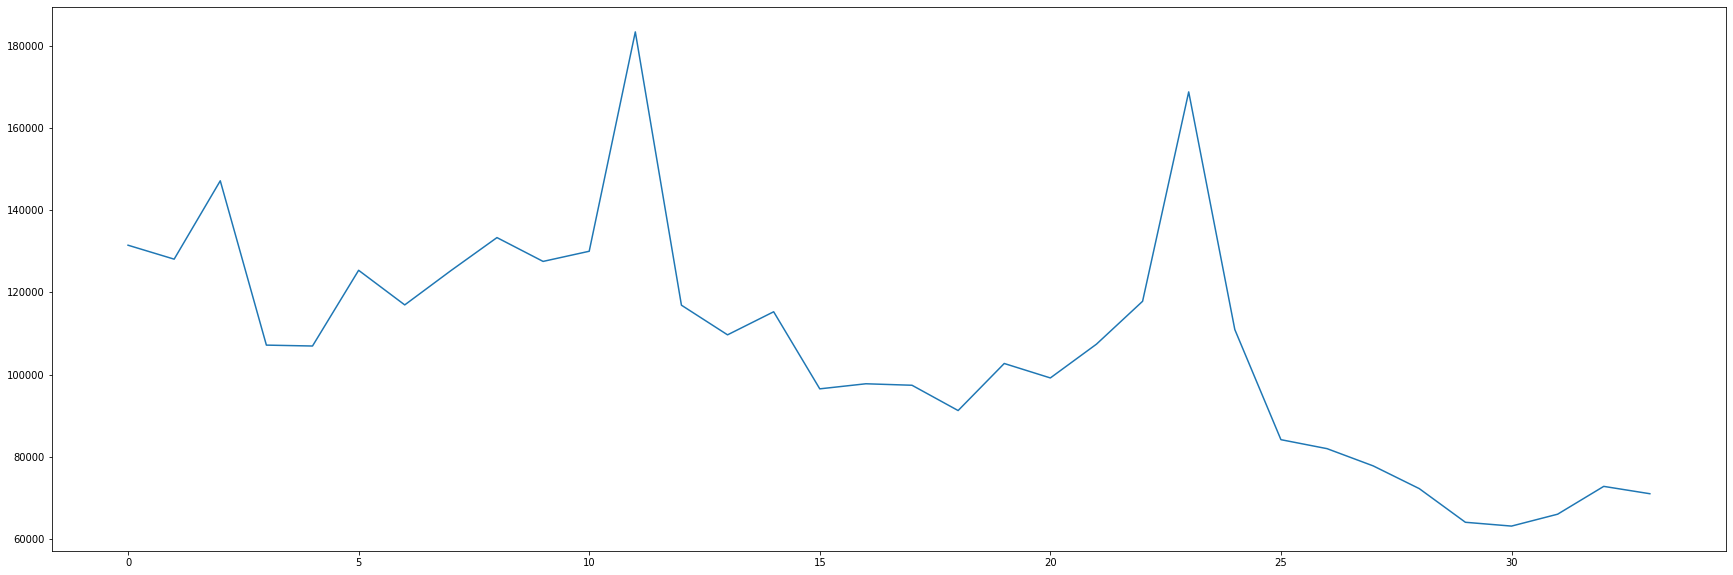

In [154]:
def visualize(df,column):
    temp=df.groupby([column])['item_cnt_day'].sum().reset_index()
    plt.plot(temp[column],temp['item_cnt_day'])
visualize(df_train,'date_block_num')

## SHOP (one-hot)


In [157]:
df_train.shop_id.nunique()

60

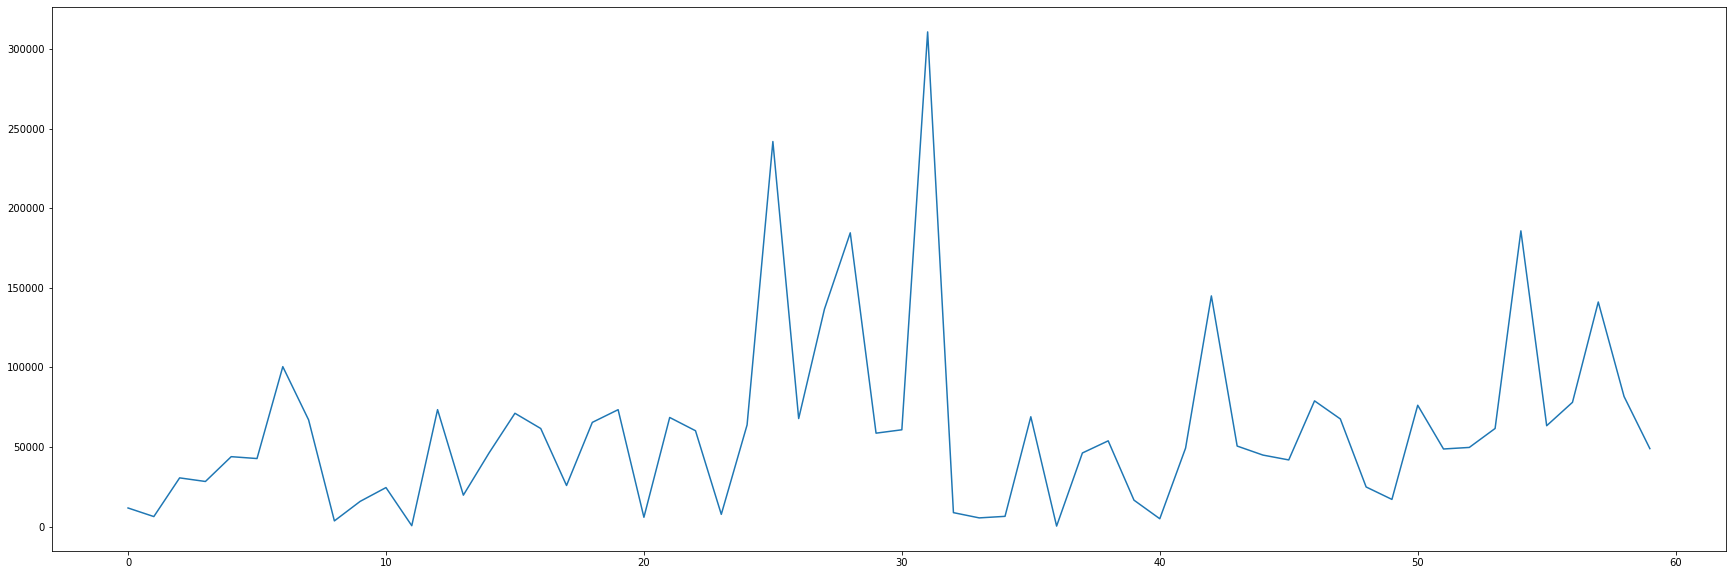

In [56]:
visualize(df_train,'shop_id')

## Item ID and Price

In [135]:
temp=df_train.groupby(['item_id'])['item_price'].nunique().eq(1).reset_index()


In [105]:
item_price_list=temp[temp['item_price']==False][['item_id']].values

In [172]:
df_train.loc[df_train['item_id'].isin(item_price_list)].sort_values(['item_id'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
1909009,2014-08-26,19,54,3,58.0,1.0,26,8,2014
1812448,2014-05-07,18,54,3,100.0,1.0,7,5,2014
555220,2013-06-06,5,32,27,1398.0,1.0,6,6,2013
514748,2013-07-05,4,19,27,1998.0,1.0,5,7,2013
1009987,2013-10-14,9,7,27,838.6,1.0,14,10,2013
...,...,...,...,...,...,...,...,...,...
885099,2013-09-13,8,12,22168,799.0,1.0,13,9,2013
58566,2013-01-15,0,12,22168,799.0,1.0,15,1,2013
33548,2013-01-20,0,2,22168,799.0,1.0,20,1,2013
265107,2013-08-03,2,43,22168,798.5,1.0,3,8,2013


In [175]:
test

NameError: name 'test' is not defined

## Item Cnt Day

In [174]:
7356/2935849

0.0025055784544777337

In [148]:
df_train.loc[df_train['item_cnt_day']<0].sort_values('item_id')

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
468956,4,46,28,398.0,-1.0,5,6,2013
90914,0,50,29,2499.0,-1.0,18,1,2013
157212,1,25,30,399.0,-1.0,20,2,2013
2251401,23,31,31,499.0,-1.0,22,12,2014
488494,4,54,31,699.0,-1.0,5,9,2013
...,...,...,...,...,...,...,...,...
426947,3,45,22147,149.0,-1.0,18,4,2013
352567,3,22,22155,149.0,-1.0,29,4,2013
2487957,26,45,22162,399.0,-1.0,20,3,2015
2666373,29,31,22164,699.0,-1.0,20,6,2015


In [15]:
df_train['item_id'].unique().size

21807

In [11]:
pd.DatetimeIndex(df_train['date']).month.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='date')

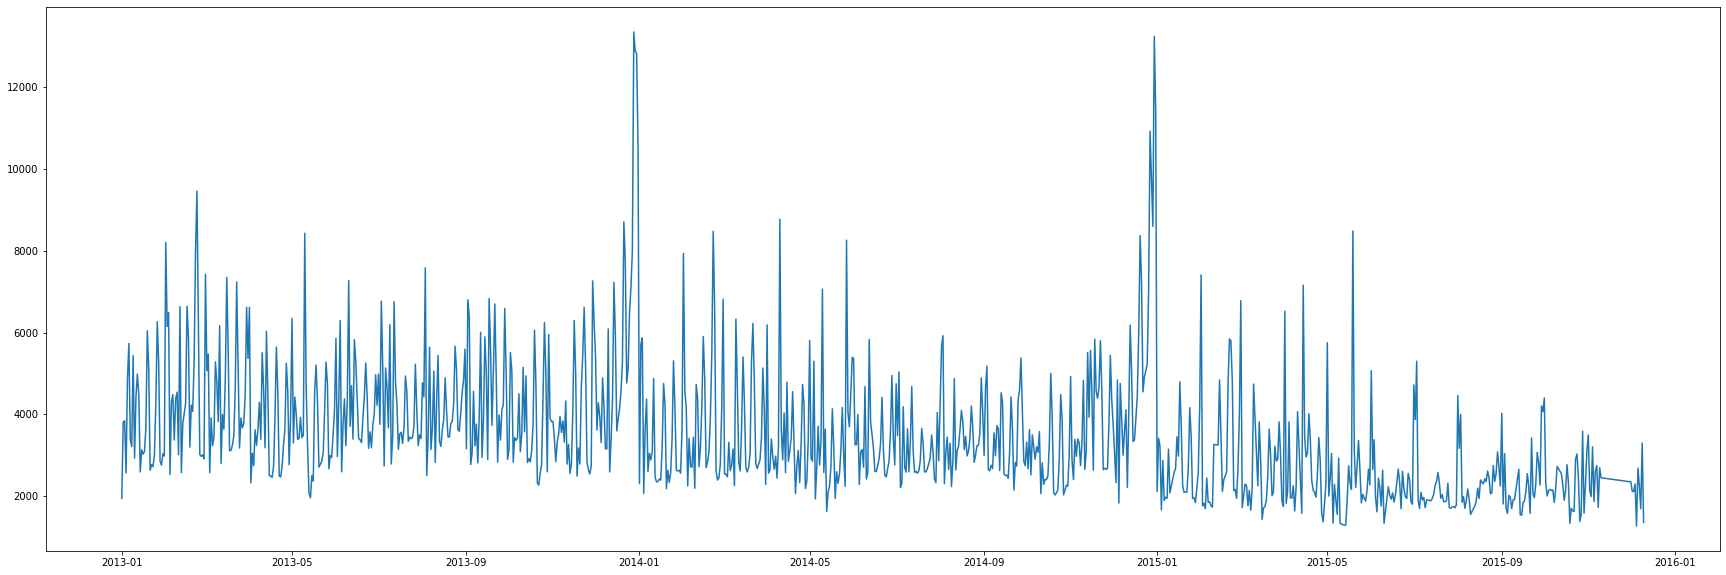

In [21]:
temp=df_train.groupby('date')['item_cnt_day'].sum().reset_index()
plt.plot(temp['date'],temp['item_cnt_day'])

In [98]:
df_train.groupby(['item_id','shop_id','date_block_num']).sum().reset_index().head(20)




,item_id,shop_id,date_block_num,item_price,item_cnt_day
0,0,54,20,58.0,1.0
1,1,55,15,8980.0,2.0
2,1,55,18,4490.0,1.0
3,1,55,19,4490.0,1.0
4,1,55,20,4490.0,1.0
5,1,55,21,4490.0,1.0
6,2,54,19,58.0,1.0
7,2,54,22,58.0,1.0
8,3,54,18,100.0,1.0
9,3,54,19,58.0,1.0
